In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import h5py

In [6]:
files_folder = "../miccai/outputs/"
file_infos = [
    ("gannet_full.h5","Gannet-full"),
    ("gannet_acc.h5","Gannet-quarter"),
    ("ft_pre_down_unet_2d.h5","DL pipeline")
]

colors = ["black","green","orange"]
colors = {file_infos[i][1]:colors[i] for i in range(len(colors))}

specs = {}
ppm=None
for file_info in file_infos:
    with h5py.File(f"{files_folder}/{file_info[0]}") as hf:
        specs[file_info[1]] = hf["reconstruction"][()]
        if ppm is None:
            ppm = hf["ppm"][()]

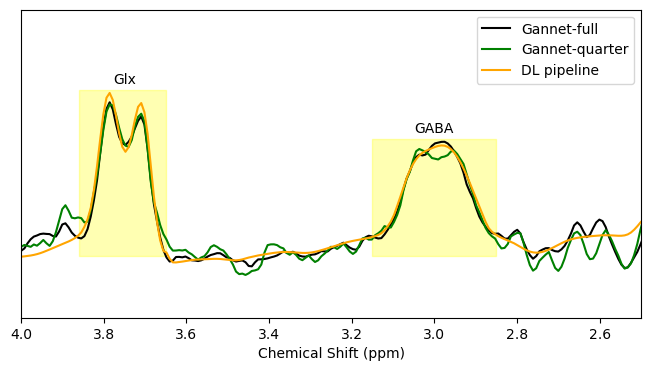

In [7]:
idx = 17

fig,ax = plt.subplots(figsize=(8,4))

for key in specs:
    ax.plot(ppm,specs[key][idx],label=key,color=colors[key])

ax.set_xlim(2.5,4)
ax.invert_xaxis()
ax.set_ylim(-0.01,0.04)

ax.annotate("GABA",(3,0.02),ha="center")
ax.annotate("Glx",(3.75,0.028),ha="center")


ax.set_yticks([])
ax.set_xlabel("Chemical Shift (ppm)")

ax.fill_between([2.85,3.15],0,0.019,color="yellow",alpha=0.3)
ax.fill_between([3.65,3.86],0.027,color="yellow",alpha=0.3)

plt.legend()
plt.savefig("miccai_spectrum.svg",dpi=600)
plt.show()

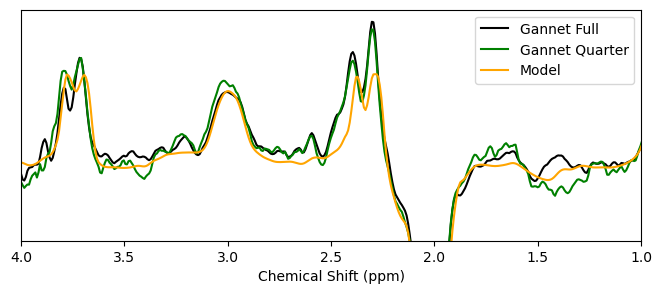

In [24]:
idx = 8

fig,ax = plt.subplots(figsize=(8,3))

for key in specs:
    ax.plot(ppm,specs[key][idx],label=key,color=colors[key])

ax.set_xlim(1,4)
ax.invert_xaxis()
ax.set_ylim(-0.002,0.004)

ax.set_yticks([])
ax.set_xlabel("Chemical Shift (ppm)")

plt.legend()
plt.show()

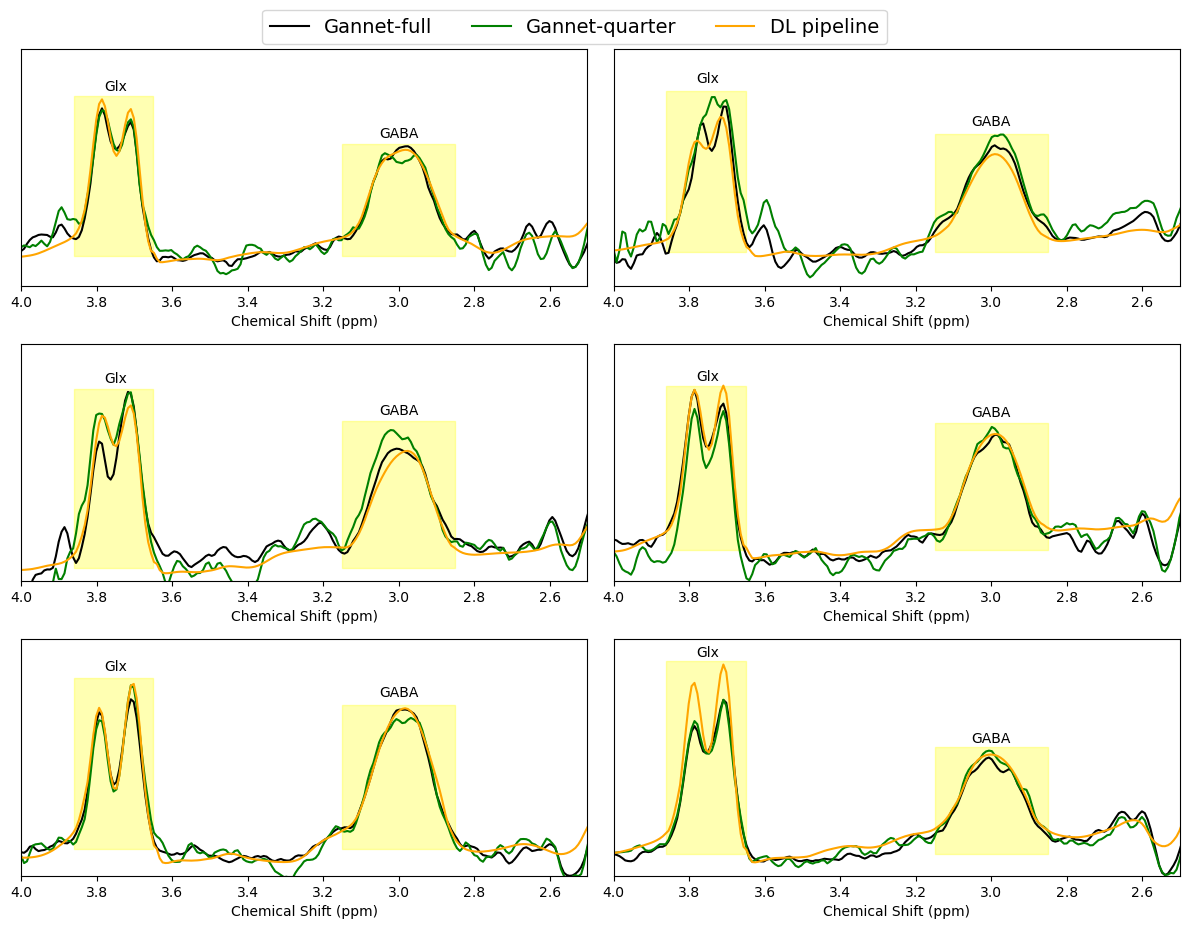

In [15]:
### show more spectra
specs_to_show_infos = [
    (17,(-0.005,0.035)),
    (2,(-0.002,0.012)),
    (8,(-0.0002,0.0035)),
    (15,(-0.005,0.034)),
    (18,(-0.0001,0.0008)),
    #(21,(-0.0003,0.001)),
    (31,(-0.001,0.01))
]

shading_limits = [(0.019,0.027),
                  (0.007,0.0095),
                  (0.0023,0.0028),
                  (0.021,0.027),
                  (0.00055,0.00065),
                  (0.005,0.009)]
anot_locations = [(0.02,0.028),
                  (0.0075,0.01),
                  (0.0024,0.0029),
                  (0.022,0.028),
                  (0.00058,0.00068),
                  (0.0052,0.0092)]

fig,ax = plt.subplots(len(specs_to_show_infos)//2,2,figsize=(12,3*(len(specs_to_show_infos)//2)))

for i,spec_info in enumerate(specs_to_show_infos):

    for key in specs:
        ax[i//2,i%2].plot(ppm,specs[key][spec_info[0]],label=key,color=colors[key])

    ax[i//2,i%2].set_xlim(2.5,4)
    ax[i//2,i%2].invert_xaxis()
    ax[i//2,i%2].set_ylim(spec_info[1][0],spec_info[1][1])


    ax[i//2,i%2].set_yticks([])
    ax[i//2,i%2].set_xlabel("Chemical Shift (ppm)")




    ax[i//2,i%2].annotate("GABA",(3,anot_locations[i][0]),ha="center")
    ax[i//2,i%2].annotate("Glx",(3.75,anot_locations[i][1]),ha="center")

    ax[i//2,i%2].fill_between([2.85,3.15],0,shading_limits[i][0],color="yellow",alpha=0.3)
    ax[i//2,i%2].fill_between([3.65,3.86],0,shading_limits[i][1],color="yellow",alpha=0.3)


plt.tight_layout()
plt.legend(ncol=3,bbox_to_anchor=(0.5,3.7),fontsize=14)
fig.savefig("miccai_spectra.svg",dpi=1200)
plt.show()